# 16기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

* User_ID **고객 ID**
* Product_ID **제품 ID**
* Gender **성별**
* Age **나이대**
* Occupation **
* City_Category **거주 도시**
* Stay_In_Current_city_Years **현재 도시에 거주한 기간**
* Marital_Status **결혼 여부**
* Product_Category_1 **제품 대분류**
* Product_Category_2 **제품 중분류**
* Product_Category_3 **제품 소분류**
* Purchase **구매 가격**

In [1]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


# Packages

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 결측치 처리

In [4]:
print('총 데이터 개수:',len(df))

총 데이터 개수: 4998


In [5]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

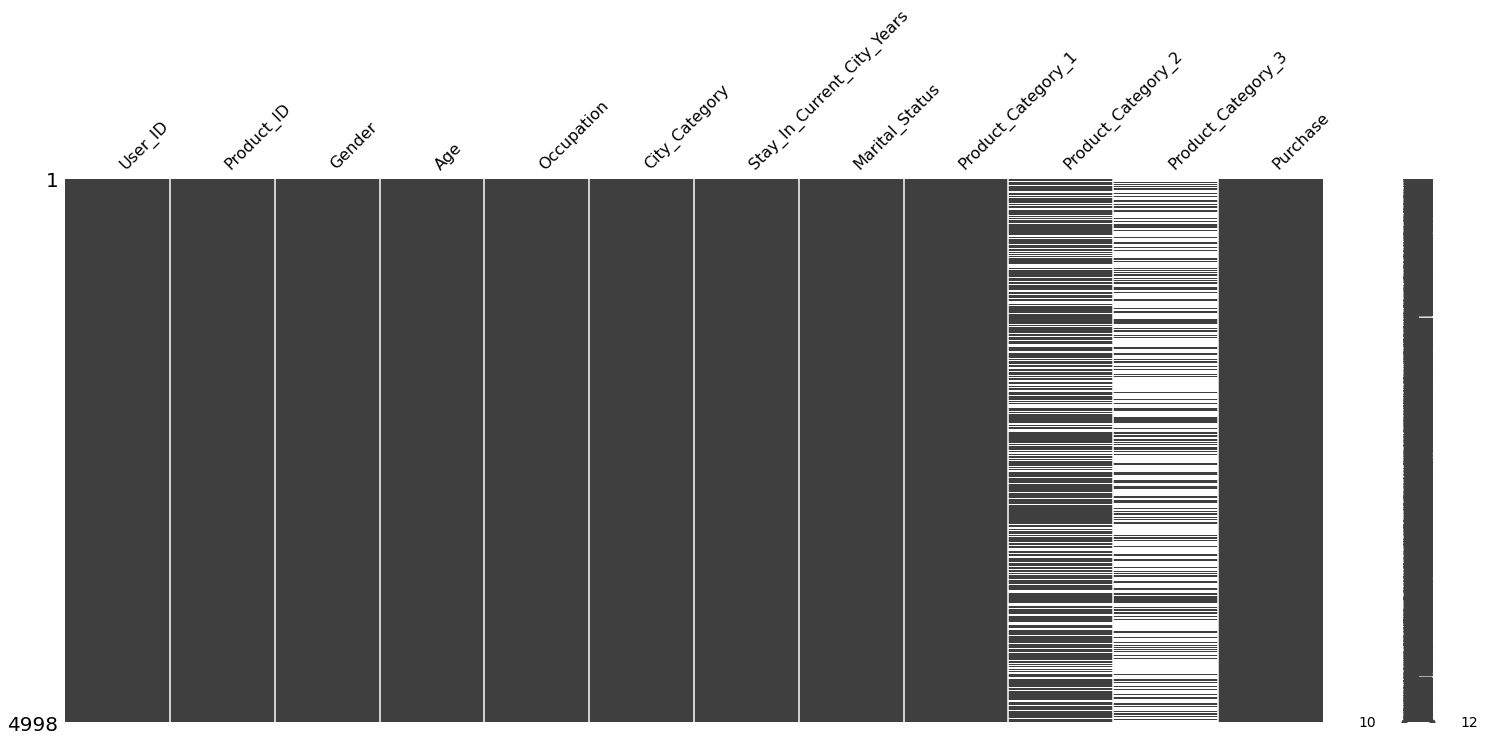

In [6]:
import missingno as msno

msno.matrix(df)

Product_Category_2과 Product_Category_3에 많은 결측치가 있음을 확인.

In [7]:
# Product_Category_2의 Null이 아닌 값들
notnull2 = np.unique(df[df['Product_Category_2'].notnull()==True]['Product_Category_2'])
print(notnull2)
print('Product_Category_2의 unique 개수 (null 제외):', len(notnull2))

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
Product_Category_2의 unique 개수 (null 제외): 17


In [8]:
pd.value_counts(df['Product_Category_2'].values)

8.0     588
14.0    496
2.0     448
16.0    392
15.0    345
5.0     258
4.0     246
6.0     148
17.0    132
11.0    110
13.0    102
9.0      65
12.0     40
3.0      35
10.0     30
18.0     23
7.0       7
dtype: int64

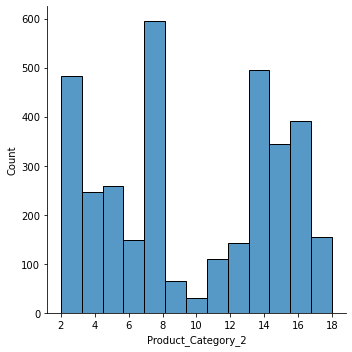

In [9]:
sns.displot(pd.value_counts(df['Product_Category_2'].values), x=df['Product_Category_2'])

In [10]:
# Product_Category_3의 Null이 아닌 값들
notnull3 = np.unique(df[df['Product_Category_3'].notnull()==True]['Product_Category_3'])
print(notnull3)
print('Product_Category_3의 unique 개수 (null 제외):', len(notnull3))

[ 3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
Product_Category_3의 unique 개수 (null 제외): 15


In [11]:
pd.value_counts(df['Product_Category_3'].values)

16.0    318
15.0    260
14.0    162
17.0    146
5.0     140
8.0     116
9.0     105
12.0     96
13.0     50
6.0      44
18.0     44
10.0     23
11.0     22
4.0      17
3.0       1
dtype: int64

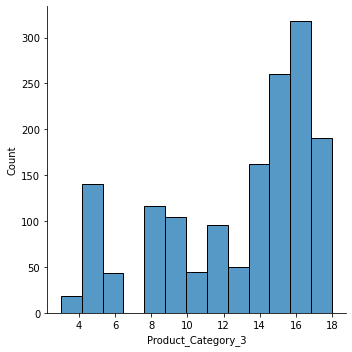

In [12]:
sns.displot(pd.value_counts(df['Product_Category_3'].values), x=df['Product_Category_3'])

#### **결측치를 평균값으로 대치**

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
df.iloc[:,9:11] = imputer.fit_transform(df.iloc[:,9:11])

* Product_Category_2

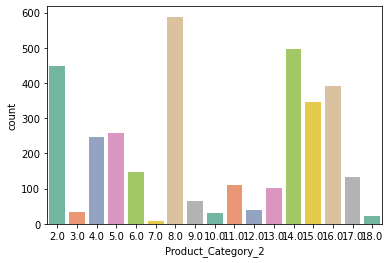

In [58]:
# 결측 처리 전
sns.countplot(x = 'Product_Category_2', data = df, palette='Set2')

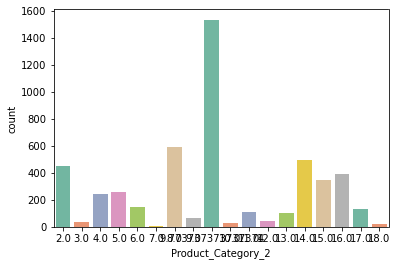

In [20]:
# 결측 처리 후
sns.countplot(x = 'Product_Category_2', data = df, palette='Set2')

* Product_Category_3

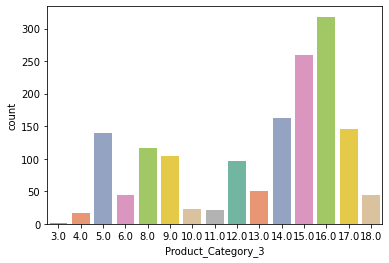

In [59]:
# 결측 처리 전
sns.countplot(x = 'Product_Category_3', data = df, palette='Set2')

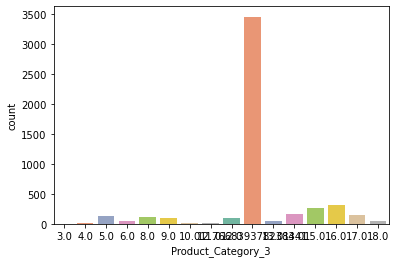

In [28]:
# 결측 처리 후
sns.countplot(x = 'Product_Category_3', data = df, palette='Set2')

결측치가 너무 많아 평균값으로 대치한 결과, 원본 데이터의 분포와 많이 달라지기 때문에 변수를 제거하기로 결정하였다.

### **결측치가 큰 변수 제거**

In [32]:
df = df.drop(["Product_Category_2","Product_Category_3"], axis=1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5780
...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,1413


## Data Exploration

#### * Gender

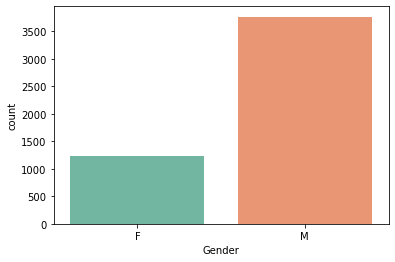

In [33]:
sns.countplot(x = 'Gender', data = df, palette='Set2')

남성이 더 많음.

#### * Age

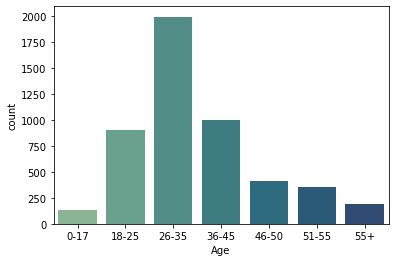

In [32]:
sns.countplot(x = 'Age', data = df, palette = 'crest')

26-35세가 가장 많음.

#### * Occupation

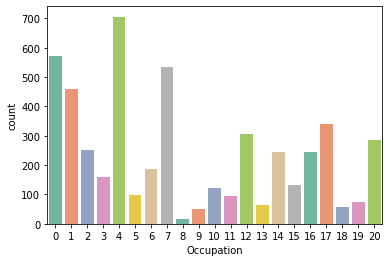

In [33]:
sns.countplot(x = 'Occupation', data = df, palette = 'Set2')

4번 직업이 가장 많음.

#### * City_Category

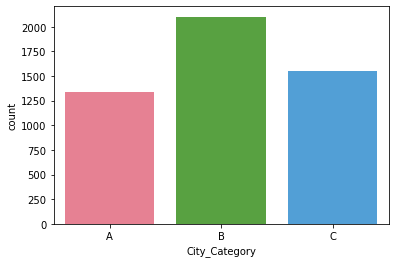

In [38]:
sns.countplot(x = 'City_Category', data = df, palette = 'husl')

B 도시에 사는 소비자가 가장 많음.

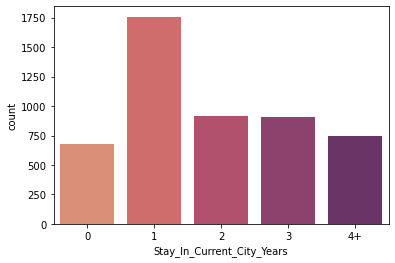

In [56]:
sns.countplot(x = 'Stay_In_Current_City_Years', data = df, palette = 'flare', order = ['0', '1', '2', '3', '4+'])

1년 거주한 사람이 많음.

#### * Marital Status

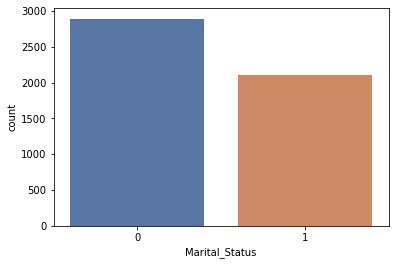

In [55]:
sns.countplot(x = 'Marital_Status', data = df, palette='deep')

미혼이 더 많음.

#### * Product_Category_1

In [73]:
len(np.unique(df['Product_Category_1']))

20

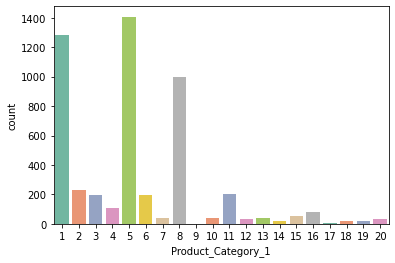

In [57]:
sns.countplot(x = 'Product_Category_1', data = df, palette='Set2')

1, 5, 8 품목이 가장 많이 소비됨.

#### * **purchase**

In [36]:
len(np.unique(df['Purchase']))

3736

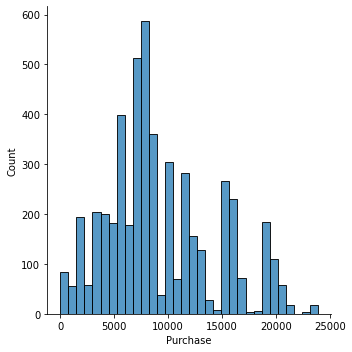

In [37]:
sns.displot(x = 'Purchase', data = df)

* Gender별 Purchase Box-plot

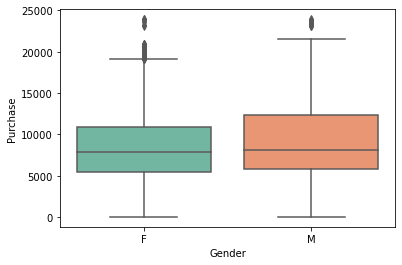

In [40]:
sns.boxplot(x=df['Gender'],y=df['Purchase'], palette='Set2')

성별별 소비의 평균은 비슷하다

* Product_Category_1 x Purchase barplot

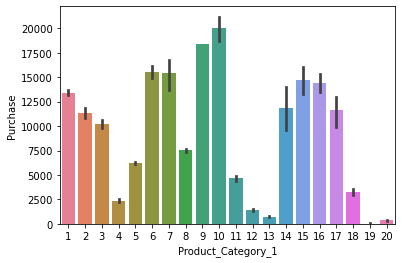

In [45]:
sns.barplot(x='Product_Category_1',y='Purchase', palette = 'husl', data=df)

## Data Preprocessing
* **label : Purchase**
* features: 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1'

In [48]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5780
...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,1413


In [72]:
X = df.iloc[:,2:-1]
y = df.iloc[:,-1]

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      4998 non-null   object
 1   Age                         4998 non-null   object
 2   Occupation                  4998 non-null   int64 
 3   City_Category               4998 non-null   object
 4   Stay_In_Current_City_Years  4998 non-null   object
 5   Marital_Status              4998 non-null   int64 
 6   Product_Category_1          4998 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 472.4+ KB


In [74]:
X = pd.get_dummies(X, columns =  X.columns.tolist(), drop_first=True)
X

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4994,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4995,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# KNN

## 1. KNN Regression - Purchase 수치 예측
* 수치형 예측

**Split Dataset**

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
print(X_train.shape , X_test.shape , y_train.shape, y_test.shape)

(3998, 53) (1000, 53) (3998,) (1000,)


In [79]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 30)

regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [148]:
# MSE 계산 -> 최적의 k 찾기

k_list = [i for i in range(1, 500, 10)] 
mse_scores = []

for k in k_list:
    regressor = KNeighborsRegressor(n_neighbors = k, p=2)
    regressor.fit(X_train, y_train)
    
    pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    mse_scores.append(mse)

In [165]:
for i in range(len(k_list)):
    if mse_scores[i] == np.min(mse_scores):
        print('Best k:', k_list[i])
        print('Best mse score:', mse_scores[i])

Best k: 31
Best mse score: 19394118.835203957


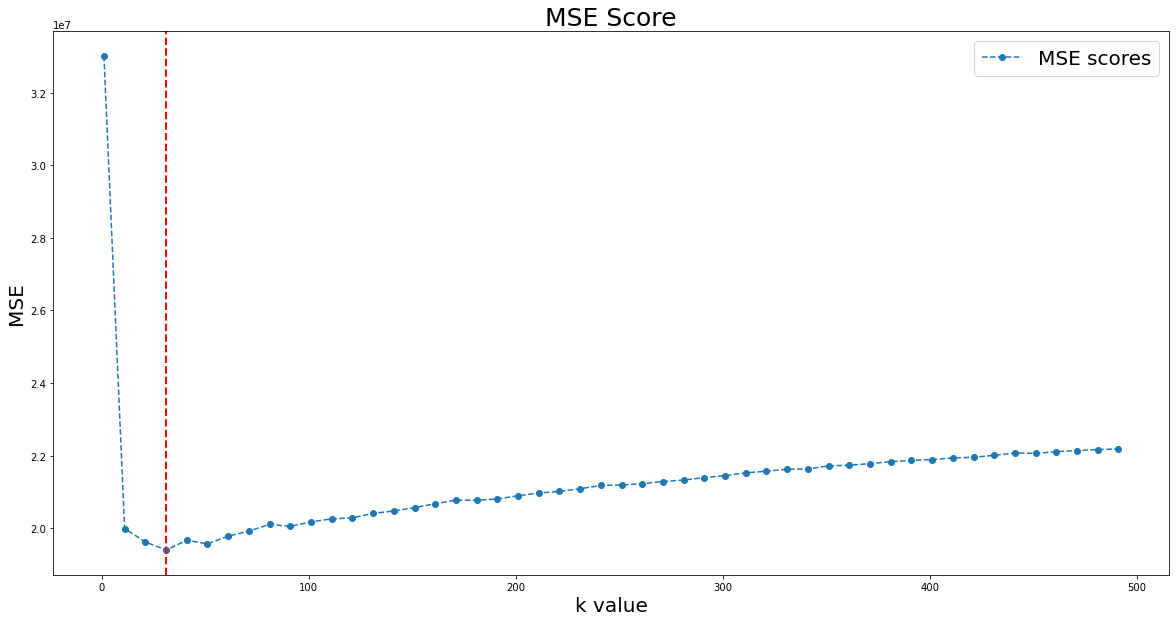

In [166]:
plt.figure(figsize=(20,10))
plt.plot(k_list, mse_scores, marker='o', linestyle='dashed')
plt.legend(['MSE scores'], fontsize=20)
plt.xlabel('k value', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.title('MSE Score', fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

Best k:  [31]


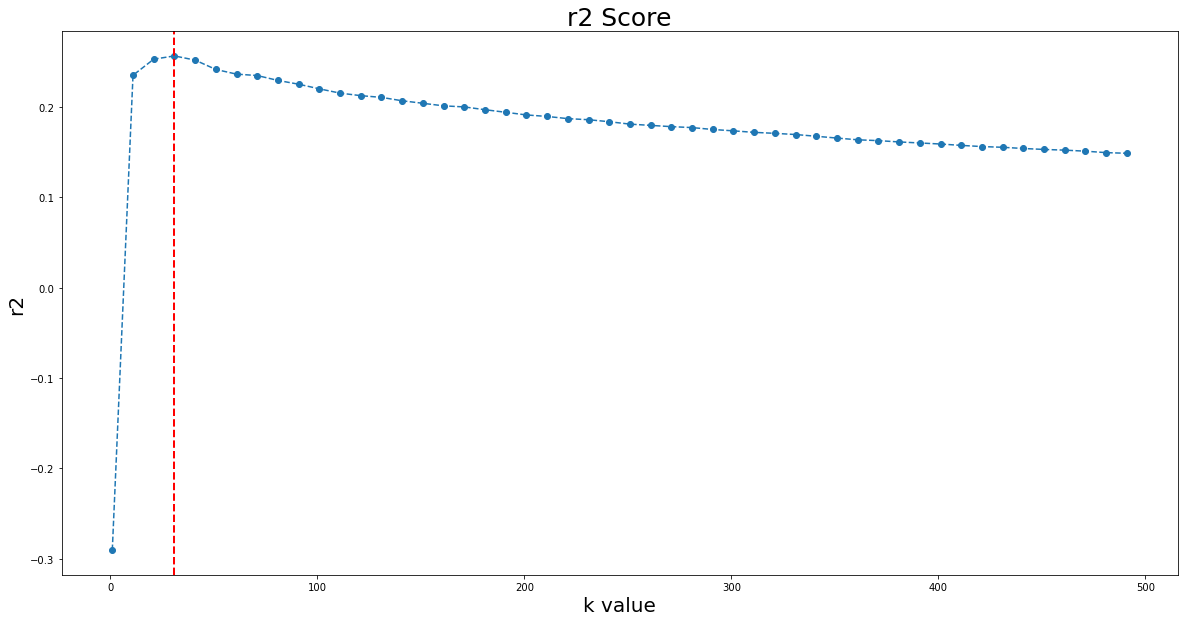

In [169]:
# cv 를 이용한 R-squared 계산 -> 최적의 k 찾기
from sklearn.model_selection import cross_val_score

cv_scores = []
for k in k_list:
    regressor = KNeighborsRegressor(n_neighbors = k, p=2) 
    
    scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring = 'r2')
    cv_scores.append(scores.mean())
    
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print("Best k: ", best_k)

plt.figure(figsize=(20, 10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('k value', fontsize=20)
plt.ylabel('r2', fontsize=20)
plt.title('r2 Score', fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

MSE, R-squared 두 가지 지표에 대해 최적의 k값은 31이다. <br>
**최적의 K: 31**

In [170]:
regressor = KNeighborsRegressor(n_neighbors = 31, p=2)
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

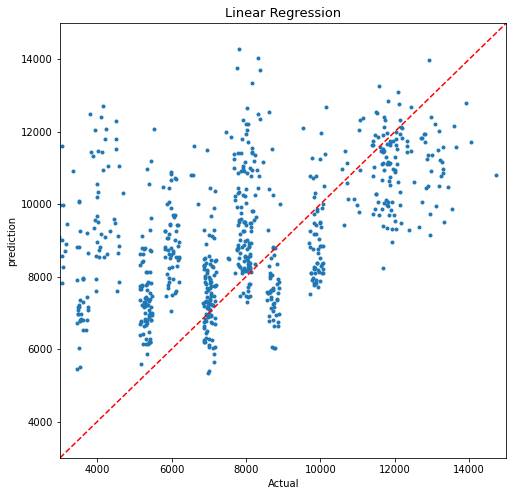

In [171]:
plt.figure(figsize=(8,8))

plt.plot(y_test, pred, '.') # 예측 vs 실제 데이터 plot
plt.xlim(3000,15000)
plt.ylim(3000,15000)
plt.plot([3000,15000],[3000,15000],ls="--",c="red")

# plt.plot(x, y)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Linear Regression', fontsize=13)
plt.show()

## 2. KNN Classifier - Purchase 변수 범주화 후 분류 예측

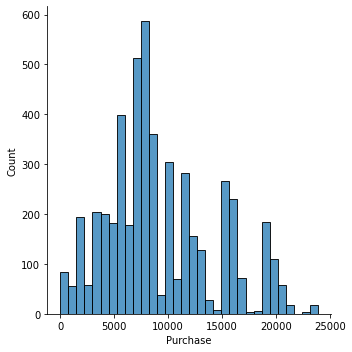

In [185]:
# 범주화 전 연속형인 Purchase 변수
sns.displot(x = 'Purchase', data = df)

In [173]:
y_cut = pd.cut(y, bins = [0,5000,10000,15000,20000,25000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000'])

In [118]:
y_cut.value_counts()

5000-10000     2433
15000-20000     864
0-5000          851
10000-15000     745
20000-25000     105
Name: Purchase, dtype: int64

C:\Users\com\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


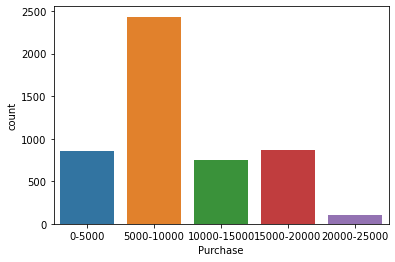

In [175]:
# 범주화 후 Purchase 변수
sns.countplot(y_cut)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cut, test_size=0.2, random_state=0)

Best k:  [21]


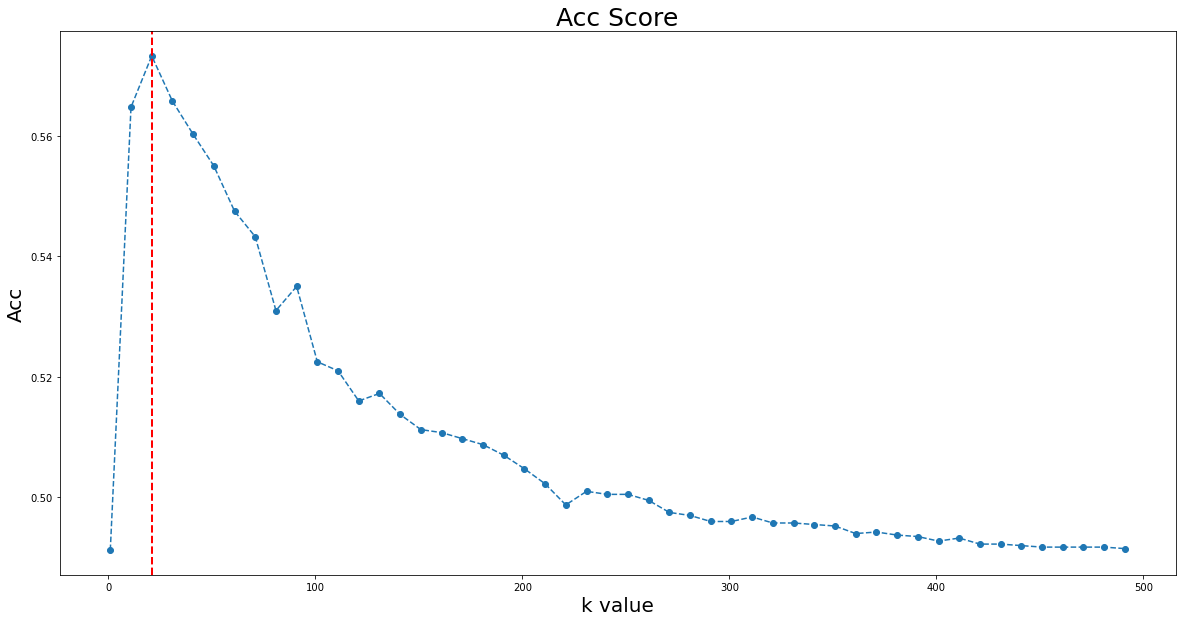

In [177]:
# cv 를 이용한 score 계산 -> 최적의 k 찾기
from sklearn.neighbors import KNeighborsClassifier

cv_scores = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k, p=2) 
    
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print("Best k: ", best_k)

plt.figure(figsize=(20, 10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('k value', fontsize=20)
plt.ylabel('Acc', fontsize=20)
plt.title('Acc Score', fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [182]:
classifier = KNeighborsClassifier(n_neighbors = 21, p=2) 
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

In [183]:
pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Pred'], margins=True, margins_name='total')

Pred,0-5000,10000-15000,15000-20000,5000-10000,total
Actual,,,,,
0-5000,21,18,33,99,171
5000-10000,7,14,34,413,468
10000-15000,2,43,44,63,152
15000-20000,8,25,91,65,189
20000-25000,0,1,16,3,20
total,38,101,218,643,1000


In [184]:
from sklearn import metrics
print(metrics.classification_report(y_test,pred, digits=2))

              precision    recall  f1-score   support

      0-5000       0.55      0.12      0.20       171
 10000-15000       0.43      0.28      0.34       152
 15000-20000       0.42      0.48      0.45       189
 20000-25000       0.00      0.00      0.00        20
  5000-10000       0.64      0.88      0.74       468

    accuracy                           0.57      1000
   macro avg       0.41      0.35      0.35      1000
weighted avg       0.54      0.57      0.52      1000



C:\Users\com\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
classifier.score(X_test, y_test).round(2)

0.57